In [2]:
res_counter = 0
with open("/home/yifan/Downloads/AF2_dy_1") as file:
    lines = file.readlines()
    for line in lines:
        if "HETATM" in line and "MOL" in line:
            print(line)
            res_counter += 1

HETATM 4150  N   MOL B 623      17.377 -19.201  17.905  1.00  0.00           N  

HETATM 4151  C   MOL B 623      17.462 -19.256  16.437  1.00  0.00           C  

HETATM 4152  C1  MOL B 623      16.453 -18.422  18.505  1.00  0.00           C  

HETATM 4153  O   MOL B 623      15.716 -17.653  17.902  1.00  0.00           O  

HETATM 4154  C2  MOL B 623      16.364 -20.070  15.786  1.00  0.00           C  

HETATM 4155  O1  MOL B 623      16.559 -21.201  15.362  1.00  0.00           O  

HETATM 4156  C3  MOL B 623      18.830 -19.916  16.221  1.00  0.00           C  

HETATM 4157  C4  MOL B 623      16.350 -18.549  20.014  1.00  0.00           C  

HETATM 4158  N1  MOL B 623      15.196 -19.411  15.713  1.00  0.00           N  

HETATM 4159  C5  MOL B 623      18.994 -20.838  17.432  1.00  0.00           C  

HETATM 4160  N2  MOL B 623      14.989 -19.102  20.325  1.00  0.00           N1+

HETATM 4161  C6  MOL B 623      16.486 -17.144  20.637  1.00  0.00           C  

HETATM 4162  C7 

In [3]:
print(f"The system contains {res_counter} ligand atoms.")

The system contains 52 ligand atoms.


In [6]:
import numpy as np
import MDAnalysis as mda
import MDAnalysis.analysis.rms
import MDAnalysis.analysis.distances
import matplotlib.pyplot as plt

In [25]:
alphafold_data_path = "/home/yifan/Downloads/"
crystal_data_path ="/home/yifan/Desktop/"

xtal_filenames = ['2ZFF__1__P_Dynamics', '2ZFF__1__P_Dynamics_3', '2ZFF__1__P_Dynamics_4', '2ZFF__1__P_Dynamics_5', '2ZFF__1__P_Dynamics_6', '2ZFF__1__P_Dynamics_7','2ZFF__1__P_Dynamics_8', '2ZFF__1__P_Dynamics_9', '2ZFF__1__P_Dynamics_10', '2ZFF__1__P_Dynamics_11','2ZFF__1__P_Dynamics_2']
af_filenames = ['AF-P00734-F1-model_v2_P_3u8t_362_9.model_Dynamics', 'MODEL_AF-P00734-F1-model_v2_P_3u8t_362_9.model_Dynamics', 'MODEL_AF-P00734-F1-model_v2_P_3u8t_362_9.model_Dynamics_1', 'MODEL_AF-P00734-F1-model_v2_P_3u8t_362_9.model_Dynamics_2', 'MODEL_AF-P00734-F1-model_v2_P_3u8t_362_9.model_Dynamics_3', 'MODEL_AF-P00734-F1-model_v2_P_3u8t_362_9.model_Dynamics_4', 'MODEL_AF-P00734-F1-model_v2_P_3u8t_362_9.model_Dynamics_5', 'MODEL_AF-P00734-F1-model_v2_P_3u8t_362_9.model_Dynamics_6', 'MODEL_AF-P00734-F1-model_v2_P_3u8t_362_9.model_Dynamics_7', 'MODEL_AF-P00734-F1-model_v2_P_3u8t_362_9.model_Dynamics_8', 'MODEL_AF-P00734-F1-model_v2_P_3u8t_362_9.model_Dynamics_9' ]

2ZFF__1__P_Dynamics
AF-P00734-F1-model_v2_P_3u8t_362_9.model_Dynamics
[[0.00000000e+00 1.00000000e+00 2.00000000e+00 ... 4.99700000e+03
  4.99800000e+03 4.99900000e+03]
 [0.00000000e+00 4.88882123e-05 9.77764246e-05 ... 2.44294397e-01
  2.44343285e-01 2.44392173e-01]
 [7.49928569e-07 5.94654643e-01 6.56943374e-01 ... 2.57424079e+00
  2.59529171e+00 2.60444339e+00]]
[[0.00000000e+00 1.00000000e+00 2.00000000e+00 ... 4.99700000e+03
  4.99800000e+03 4.99900000e+03]
 [0.00000000e+00 4.88882123e-05 9.77764246e-05 ... 2.44294397e-01
  2.44343285e-01 2.44392173e-01]
 [5.80611751e-07 6.14003829e-01 6.93592649e-01 ... 1.78076378e+00
  1.81752239e+00 1.87498083e+00]]
[[0.00000000e+00 1.00000000e+00 2.00000000e+00 ... 4.99700000e+03
  4.99800000e+03 4.99900000e+03]
 [0.00000000e+00 4.88882123e-05 9.77764246e-05 ... 2.44294397e-01
  2.44343285e-01 2.44392173e-01]
 [5.80611751e-07 6.14003829e-01 6.93592649e-01 ... 1.78076378e+00
  1.81752239e+00 1.87498083e+00]]
last crystal simulation time: 0.2443

OSError: DCD file does not exist

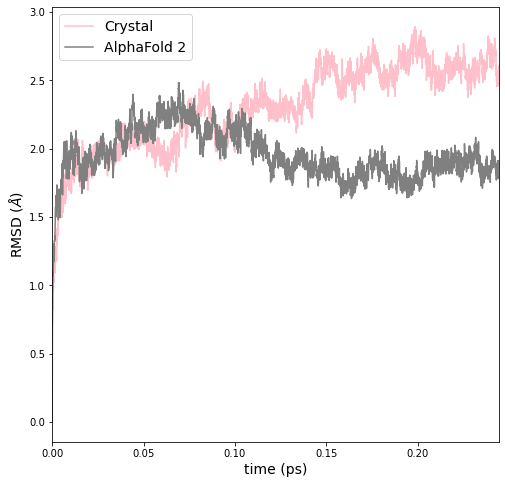

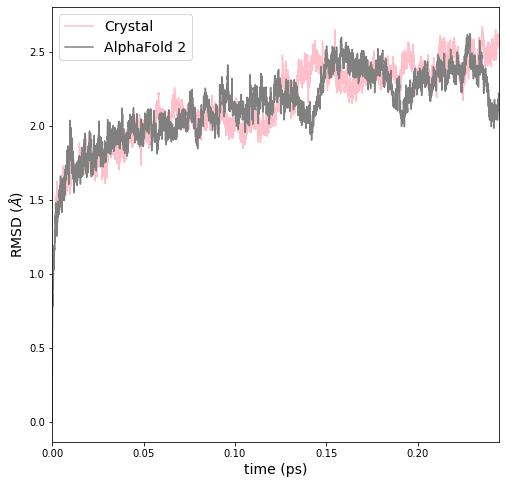

In [26]:
for i in range(len(xtal_filenames)):
    print(xtal_filenames[i])
    print(af_filenames[i])
    af_protein_frames = []
    with mda.lib.formats.libdcd.DCDFile(alphafold_data_path+f"{af_filenames[i]}.dcd") as trajectory_file:
        for frame in trajectory_file:
            af_protein_frames.append(frame)
    xtal_protein_frames = []
    with mda.lib.formats.libdcd.DCDFile(crystal_data_path+f"{xtal_filenames[i]}.dcd") as trajectory_file:
        for frame in trajectory_file:
            xtal_protein_frames.append(frame)

    xtal_protein_first_frame = xtal_protein_frames[0].xyz
    xtal_universe = mda.Universe(crystal_data_path+f"{xtal_filenames[i]}.prmtop", crystal_data_path+f"{xtal_filenames[i]}.dcd")
    xtal_reference_universe = mda.Universe(crystal_data_path+f"{xtal_filenames[i]}.prmtop", xtal_protein_first_frame)

    af_protein_first_frame = af_protein_frames[0].xyz
    af_universe = mda.Universe(alphafold_data_path+f"{af_filenames[i]}.prmtop", alphafold_data_path+f"{af_filenames[i]}.dcd")
    af_reference_universe = mda.Universe(alphafold_data_path+f"{af_filenames[i]}.prmtop", af_protein_first_frame)

    xtal_protein_structure = xtal_universe.select_atoms("protein")
    xtal_reference_protein_structure = xtal_reference_universe.select_atoms("protein")

    af_protein_structure = af_universe.select_atoms("protein")
    af_reference_protein_structure = af_reference_universe.select_atoms("protein")

    xtal_rmsd_protein = mda.analysis.rms.RMSD(xtal_protein_structure, xtal_reference_protein_structure, select="backbone")
    xtal_rmsd_protein.run()

    af_rmsd_protein = mda.analysis.rms.RMSD(af_protein_structure, af_reference_protein_structure, select="backbone")
    af_rmsd_protein.run()

    xtal_protein_rmsd_result = xtal_rmsd_protein.results.rmsd.T
    print(xtal_protein_rmsd_result)

    af_protein_rmsd_result = af_rmsd_protein.results.rmsd.T
    print(af_protein_rmsd_result)

    af_protein_rmsd_result = af_rmsd_protein.results.rmsd.T
    print(af_protein_rmsd_result)

    af_protein_time = af_protein_rmsd_result[1]
    af_protein_rmsd_values = af_protein_rmsd_result[2]

    xtal_protein_time = xtal_protein_rmsd_result[1]
    xtal_protein_rmsd_values = xtal_protein_rmsd_result[2]

    print(f"last crystal simulation time: {xtal_protein_time[-1]}")
    print(f"last alphafold 2 simulation time: {af_protein_time[-1]}")

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    ax.plot(xtal_protein_time, xtal_protein_rmsd_values, color="pink", label="Crystal")
    ax.plot(af_protein_time, af_protein_rmsd_values, color="grey", label="AlphaFold 2")
    ax.set_xlabel("time (ps)", fontsize = 14)
    ax.set_ylabel(r"RMSD ($\AA$)", fontsize = 14)
    ax.legend(fontsize=14)
    ax.set_xlim(0, xtal_protein_time[-1])
    # fig.savefig("rmsd_protein_comparison_1c.jpg")

In [5]:
xtal_protein_frames = []
with mda.lib.formats.libdcd.DCDFile(crystal_data_path+"2ZFF__1__P_Dynamics_4.dcd") as trajectory_file:
    for frame in trajectory_file:
        xtal_protein_frames.append(frame)

In [6]:
xtal_protein_first_frame = xtal_protein_frames[0].xyz
xtal_universe = mda.Universe(crystal_data_path+"2ZFF__1__P_Dynamics_4.prmtop", crystal_data_path+"2ZFF__1__P_Dynamics_4.dcd")
xtal_reference_universe = mda.Universe(crystal_data_path+"2ZFF__1__P_Dynamics_4.prmtop", xtal_protein_first_frame)

In [12]:
af_protein_first_frame = af_protein_frames[0].xyz
af_universe = mda.Universe(alphafold_data_path+"AF2_dy_1.prmtop", alphafold_data_path+"AF2_dy_1.dcd")
af_reference_universe = mda.Universe(alphafold_data_path+"AF2_dy_1.prmtop", af_protein_first_frame)

In [13]:
xtal_protein_structure = xtal_universe.select_atoms("protein")
xtal_reference_protein_structure = xtal_reference_universe.select_atoms("protein")

In [14]:
af_protein_structure = af_universe.select_atoms("protein")
af_reference_protein_structure = af_reference_universe.select_atoms("protein")

RMSD Calculation

In [15]:
xtal_rmsd_protein = mda.analysis.rms.RMSD(xtal_protein_structure, xtal_reference_protein_structure, select="backbone")
xtal_rmsd_protein.run()

In [16]:
af_rmsd_protein = mda.analysis.rms.RMSD(af_protein_structure, af_reference_protein_structure, select="backbone")
af_rmsd_protein.run()

In [17]:
xtal_protein_rmsd_result = xtal_rmsd_protein.results.rmsd.T
print(xtal_protein_rmsd_result)

[[0.00000000e+00 1.00000000e+00 2.00000000e+00 ... 4.99700000e+03
  4.99800000e+03 4.99900000e+03]
 [0.00000000e+00 4.88882123e-05 9.77764246e-05 ... 2.44294397e-01
  2.44343285e-01 2.44392173e-01]
 [5.80892172e-07 5.74285143e-01 6.39101743e-01 ... 2.55593157e+00
  2.60195960e+00 2.70500315e+00]]


In [18]:
af_protein_rmsd_result = af_rmsd_protein.results.rmsd.T
print(af_protein_rmsd_result)

[[0.00000000e+00 1.00000000e+00 2.00000000e+00 ... 4.99700000e+03
  4.99800000e+03 4.99900000e+03]
 [0.00000000e+00 4.88882123e-05 9.77764246e-05 ... 2.44294397e-01
  2.44343285e-01 2.44392173e-01]
 [8.86899099e-07 5.95457803e-01 7.64201351e-01 ... 2.18349919e+00
  2.21395531e+00 2.17026861e+00]]


In [19]:
af_protein_rmsd_result = af_rmsd_protein.results.rmsd.T
print(af_protein_rmsd_result)

[[0.00000000e+00 1.00000000e+00 2.00000000e+00 ... 4.99700000e+03
  4.99800000e+03 4.99900000e+03]
 [0.00000000e+00 4.88882123e-05 9.77764246e-05 ... 2.44294397e-01
  2.44343285e-01 2.44392173e-01]
 [8.86899099e-07 5.95457803e-01 7.64201351e-01 ... 2.18349919e+00
  2.21395531e+00 2.17026861e+00]]


In [20]:
af_protein_time = af_protein_rmsd_result[1]
af_protein_rmsd_values = af_protein_rmsd_result[2]

In [23]:
xtal_protein_time = xtal_protein_rmsd_result[1]
xtal_protein_rmsd_values = xtal_protein_rmsd_result[2]

In [24]:
print(f"last crystal simulation time: {xtal_protein_time[-1]}")
print(f"last alphafold 2 simulation time: {af_protein_time[-1]}")

last crystal simulation time: 0.24439217339800481
last alphafold 2 simulation time: 0.24439217339800481


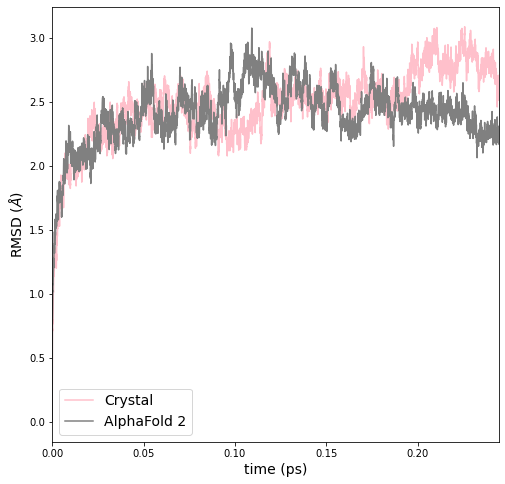

In [27]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(xtal_protein_time, xtal_protein_rmsd_values, color="pink", label="Crystal")
ax.plot(af_protein_time, af_protein_rmsd_values, color="grey", label="AlphaFold 2")
ax.set_xlabel("time (ps)", fontsize = 14)
ax.set_ylabel(r"RMSD ($\AA$)", fontsize = 14)
ax.legend(fontsize=14)
ax.set_xlim(0, xtal_protein_time[-1])
fig.savefig("rmsd_protein_comparison_1c.jpg")